In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#supaya bisa langusng keluar plot di notebook
%matplotlib inline

In [2]:
df_studentScore = pd.read_csv('data/student_scores.csv')

In [3]:
df_studentScore

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


# Part 1 - Questions

> Melihat data student score yang tersedia, muncul beberapa pertanyaan sebagai berikut :
1. Siapakah murid yang paling sering menghadiri kelas dan murid yang paling jarang hadir
2. Siapakah murid yang mendapat nilai Final tertinggi
3. Siapakah murid yang mendapat nilai Final terendah
4. Berapa nilai rata rata untuk nilai Final
5. Dari hasil nilai rata2 murid mana saja yang nilainya berada di bawah rata2?

# Part 2 - Wrangle

 **1. Mengumpulkan data**
 Data telah tersedia pada directory data dengan nama file student_scores.csv
 
 **2. Penilaian data yang telah dikumpulkan**
     - Pemeriksaan ketidak sesuaian tipe data
     - Pemeriksaan nilai yang hilang
     - Pemeriksaan data yang terduplikasi
     - Pemeriksaan outlier   

## 2. Penilaian data yang telah dikumpulkan

### Pemeriksaan ketidak sesuaian tipe data

In [11]:
df_studentScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5 non-null      int64  
 1   Name        5 non-null      object 
 2   Attendance  5 non-null      float64
 3   HW          5 non-null      float64
 4   Test1       5 non-null      float64
 5   Project1    5 non-null      float64
 6   Test2       5 non-null      float64
 7   Project2    5 non-null      float64
 8   Final       5 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 488.0+ bytes


In [9]:
# melihat tipe data untuk setiap kolom
df_studentScore.dtypes

ID              int64
Name           object
Attendance    float64
HW            float64
Test1         float64
Project1      float64
Test2         float64
Project2      float64
Final         float64
dtype: object

> **Type untuk nilai float64**

In [8]:
# mendapatkan nilai statistik sederhana untuk setiap kolom (hanya berlaku pada kolom numerik)
df_studentScore.describe()

,ID,Attendance,HW,Test1,Project1,Test2,Project2,Final
count,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,30692.600000,0.81600,0.880000,85.40000,90.200000,86.600000,87.600000,88.000000
std,4915.212691,0.28369,0.105594,11.39298,12.049896,8.473488,5.683309,5.244044
min,27492.000000,0.32000,0.740000,68.00000,70.000000,73.000000,81.000000,82.000000
25%,27604.000000,0.84000,0.840000,82.00000,89.000000,84.000000,82.000000,84.000000
50%,28592.000000,0.96000,0.850000,87.00000,94.000000,90.000000,90.000000,88.000000
75%,30572.000000,0.96000,0.970000,92.00000,98.000000,92.000000,92.000000,91.000000
max,39203.000000,1.00000,1.000000,98.00000,100.000000,94.000000,93.000000,95.000000


### Pemeriksaan nilai yang hilang

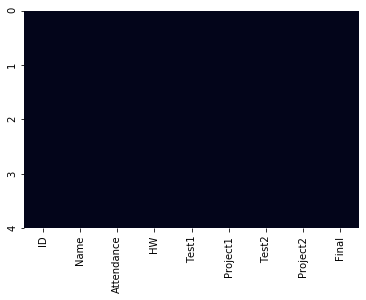

In [14]:
sns.heatmap(df_studentScore.isna(), cbar=False);

In [12]:
df_studentScore.isna().sum()

ID            0
Name          0
Attendance    0
HW            0
Test1         0
Project1      0
Test2         0
Project2      0
Final         0
dtype: int64

> **Hasil : Tidak ada nilai yang hilang**

### Pemeriksaan data yang terduplikasi

In [16]:
df_studentScore.duplicated().sum()

0

> **Hasil : Tidak ada data yg duplikasi**

# Part 3 - Explore 
## Exploratory Data Analysis (EDA)

In [17]:
df_studentScore

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


###  Melihat Pengaruh Jumlah Kehadiran dengan Nilai Final

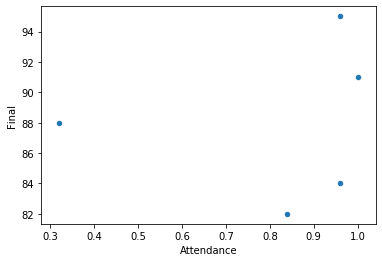

In [19]:
df_studentScore.plot(x='Attendance', y='Final', kind='scatter');

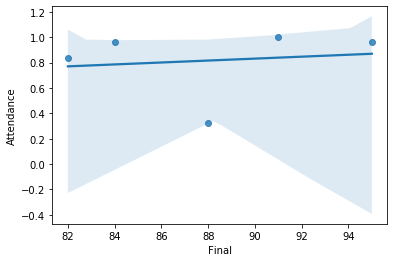

In [23]:
sns.regplot(x='Final', y='Attendance', data=df_studentScore);

In [37]:
# describe adalah fungsi yang digunakan untuk melihat informasi statistik sederhana pada sebuah kolom atau dataframe
df_studentScore['Final'].describe()

count     5.000000
mean     88.000000
std       5.244044
min      82.000000
25%      84.000000
50%      88.000000
75%      91.000000
max      95.000000
Name: Final, dtype: float64

Analisa Kehadiran Siswa

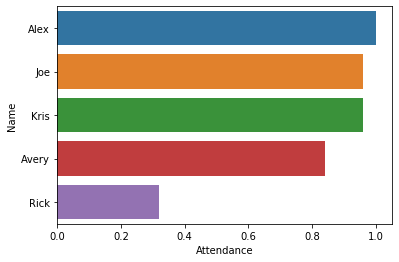

In [58]:
df_siswa_rajin = df_studentScore.sort_values('Attendance', ascending=False)
ax = sns.barplot(x="Attendance", y="Name", data=df_siswa_rajin)

**Analisa Nilai Final**

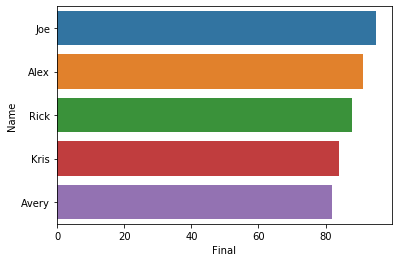

In [59]:
df_siswa_rajin = df_studentScore.sort_values('Final', ascending=False)
ax = sns.barplot(x="Final", y="Name", data=df_siswa_rajin)

**Nilai Rata-Rata untuk nilai Akhir**

In [73]:
nilaiAkhir_rata2 = df_studentScore['Final'].mean()
print(nilaiAkhir_rata2)

88.0


In [74]:
# pd.cut digunakan untuk binning dengan cepat tanpa menggunakan if else
df_nilai_akhir_rata2 = df_studentScore
df_nilai_akhir_rata2['Nilai Akhir Rata2'] = pd.cut(df_studentScore['Final'], bins=[0, 87 , 100], labels=['kurang dari rata2', 'diatas rata2'])

In [75]:
df_nilai_akhir_rata2

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final,Nilai Akhir Rata2
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0,diatas rata2
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0,diatas rata2
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0,kurang dari rata2
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0,kurang dari rata2
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0,diatas rata2


## Kesimpulan

1. Siapakah murid yang paling sering menghadiri kelas dan murid yang paling jarang hadir?
> Jawaban Paling Sering Hadir adalah Alex dengan tingkat kehadiran 100%
> dan Rick menjadi siswa paling sedikit hadir dengan tingkat kehadiran 32%

In [81]:
df_siswa_rajin = df_studentScore.sort_values('Attendance', ascending=False)

In [85]:
print(df_siswa_rajin[['Name','Attendance']])

    Name  Attendance
1   Alex        1.00
0    Joe        0.96
3   Kris        0.96
2  Avery        0.84
4   Rick        0.32


2. Siapakah murid yang mendapat nilai Final tertinggi
> Joe adalah murid yg mendapat nilai akhir paling tinggi 95

3. Siapakah murid yang mendapat nilai Final terendah
> Avery adalah murid yang mendapat nilai akhir paling rendah yaitu 82

In [88]:
df_siswa_rajin = df_studentScore.sort_values('Final', ascending=False)
print(df_siswa_rajin[['Name','Final']])

    Name  Final
0    Joe   95.0
1   Alex   91.0
4   Rick   88.0
3   Kris   84.0
2  Avery   82.0


4. Berapa nilai rata rata untuk nilai Final
> Nilai Akhir rata2 adalah 88


In [89]:
df_studentScore['Final'].mean()

88.0

5. Dari hasil nilai rata2 murid mana saja yang nilainya berada di bawah rata2?
> Avery dan Kris memiliki nilai akhir dibawah rata2

In [91]:
df_nilai_akhir_rata2

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final,Nilai Akhir Rata2
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0,diatas rata2
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0,diatas rata2
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0,kurang dari rata2
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0,kurang dari rata2
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0,diatas rata2
